<a href="https://drive.google.com/file/d/1b7tSyJBpWggHEBGdWa80JdKh7VNq2FEf/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Problem 1
Implement serial test and apply to a `samples`

In [3]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

rng.current = 1

samples = [rng() for _ in range(10000)]

In [4]:
length2 = list(zip(samples[0::2], samples[1::2]))

k=20

#2D histogram
hist, x_edges, y_edges = np.histogram2d(
    x=samples[0::2],
    y=samples[1::2],
    bins=np.linspace(0, 1, k+1)
)
f_obs = hist.ravel() #to 1D

f_exp = np.full(k*k, len(length2) / (k*k))

#print(len(f_obs), len())

chi2, p_value = stats.chisquare(f_obs, f_exp)

print(f"chi^2 = {chi2}, p-value = {p_value}")

''' plt.hist2d(
    x=samples[0::2],
    y=samples[1::2],
    bins=np.linspace(0, 1, k+1)
)
plt.show() '''

if p_value > 0.05:
  print("Generator, vozmozhno, ne plohoi.")
else:
  print("Generator plohoi.")

chi^2 = 366.4, p-value = 0.8776417239155498
Generator, vozmozhno, ne plohoi.


### Problem 2*
Implement permutation test and apply to a `samples`

In [5]:
from itertools import permutations

d = 3 #lomaetsya na d>10 :(

def get_order(group):
    return tuple(np.argsort(group))

all_possible_orders = list(permutations(range(d)))

order_counts = {order: 0 for order in all_possible_orders}

for i in range(len(samples) - d + 1):
    group = samples[i:i+d]
    order = get_order(group)
    order_counts[order] += 1

total_groups = len(samples) - d + 1
expected_count = total_groups / len(all_possible_orders)

obs = list(order_counts.values())
chi2 = sum((o - expected_count)**2 / expected_count for o in obs)
p_value = 1 - stats.chi2.cdf(chi2, len(all_possible_orders) - 1)

print(f"chi^2 = {chi2}, p-value = {p_value}")

if p_value > 0.05:
    print("Generator, vozmozhno, ne plohoi.")
else:
    print("Generator plohoi (est poryadki, vstrechaushiesya chasto).")

chi^2 = 4.9061812362472494, p-value = 0.42743703543310163
Generator, vozmozhno, ne plohoi.


In [6]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

random = [rng_bad() for _ in range(30000)]

### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [7]:
k = 20

f_obs_bad, _ = np.histogram(random, bins=np.linspace(0, 1, k+1))
f_exp_bad = np.full(k, len(random) / k)

f_obs_good, _ = np.histogram(samples, bins=np.linspace(0, 1, k+1))
f_exp_good = np.full(k, len(samples) / k)

chi2_bad, p_bad = stats.chisquare(f_obs_bad, f_exp_bad)
chi2_good, p_good = stats.chisquare(f_obs_good, f_exp_good)

print(f"chi^2 bad: {chi2_bad}, p-value: {p_bad}")
print(f"chi^2 good: {chi2_good}, p-value: {p_good}\n")

print("For bad generator:")
if p_bad > 0.05:
    print("Generator, vozmozhno, ne plohoi.\n")
else:
    print("Generator plohoi.\n")

print("For good generator:")
if p_good > 0.05:
    print("Generator, vozmozhno, ne plohoi.")
else:
    print("Generator plohoi.") #tavtologiya kakaeto poluchlas; nu i ladno))

chi^2 bad: 30.38933333333333, p-value: 0.04704786984951246
chi^2 good: 12.967999999999998, p-value: 0.8402051706755415

For bad generator:
Generator plohoi.

For good generator:
Generator, vozmozhno, ne plohoi.


### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

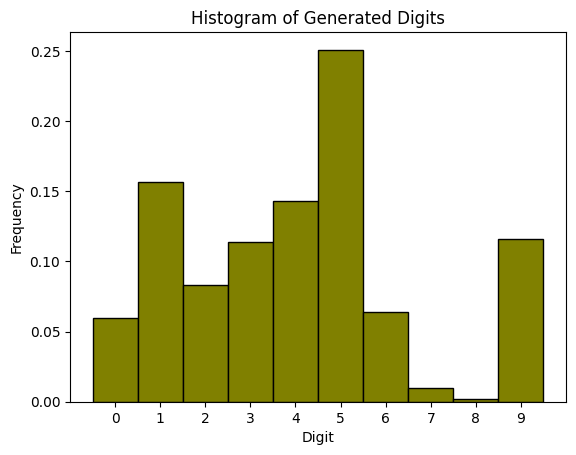

In [8]:
given_weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weights = given_weights/given_weights.sum()

sorted_indices = np.argsort(-weights)
sorted_weights = weights[sorted_indices]
sorted_digits = np.arange(10)[sorted_indices]

digits = np.arange(10)

sample = np.random.choice(digits, size=1000, p=weights)

plt.hist(sample, bins=np.arange(11)-0.5, color='olive', density = True, edgecolor='black')
plt.xticks(range(10))
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Histogram of Generated Digits')
plt.show()

### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

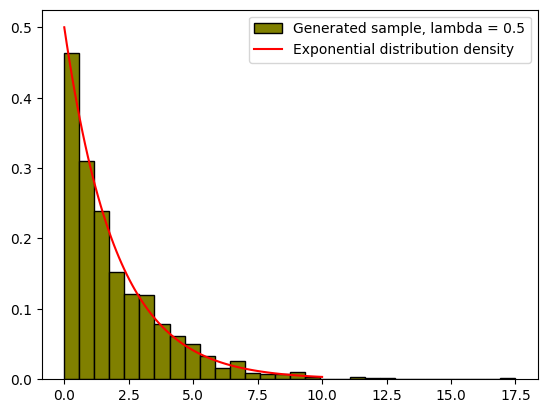

In [9]:
sample = np.array([rng() for _ in range(1000)])
lmbd = 0.5
exponential_sample = -1/lmbd*(np.log(1 - sample))

plt.hist(exponential_sample, bins = 30, color = 'olive', edgecolor = 'black', density = True, label = f'Generated sample, lambda = {lmbd}')
x = np.linspace(0, 10, 100)
plt.plot(x, lmbd*np.exp(-lmbd*x), color = 'red', label = "Exponential distribution density")
plt.legend()
plt.show()

### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

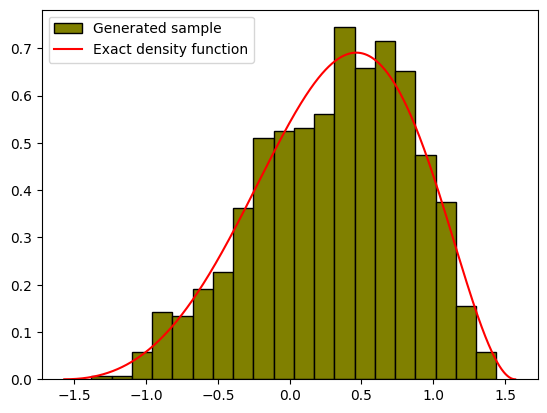

In [10]:
def target_p(x):
    return np.exp(x) * (np.cos(x) ** 2) * (np.abs(x) <= np.pi/2)

a, b = -np.pi/2, np.pi/2
M = np.max(target_p(np.linspace(a, b, 1000)))

#accept-reject
def rejection_sampling(n_samples):
    samples = []
    while len(samples) < n_samples:
        x = np.random.uniform(a, b)
        y = np.random.uniform(0, M)
        if y <= target_p(x):
            samples.append(x)
    return np.array(samples)

sample = rejection_sampling(1000)

plt.hist(sample, bins=20, density=True, color='olive', edgecolor='black', label='Generated sample')
x_plot = np.linspace(a, b, 1000)
normalized_density = target_p(x_plot) / np.trapezoid(target_p(x_plot), x_plot)
plt.plot(x_plot, normalized_density, color='red', label='Exact density function')
plt.legend()
plt.show()


## Coordinate transformation method

The accept-reject method may in some cases be inefficient and require too many sample points. An alternative is to try to find a coordinate transformation that converts a simple area (from which it is easy to sample, for example, a unit square) into the required area, but preserves the area ratio (why?).

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

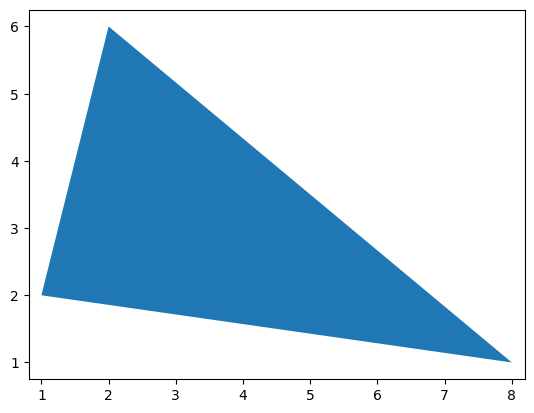

In [11]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

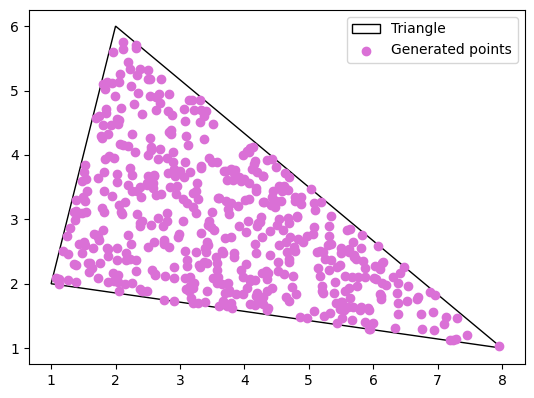

In [28]:
A = [1,2]
B = [2,6]
C = [8,1]

vertices = np.array([A, B, C])

def gen_points(vertices, n):
    points = []
    for _ in range(n):
        u, v = np.random.rand(2)
        if u + v > 1:
            u, v = 1 - u, 1 - v
        point = (1 - u - v) * vertices[0] + u * vertices[1] + v * vertices[2]
        points.append(point)
    return np.array(points)

points = gen_points(vertices, 500)

fig, ax = plt.subplots()
polygon = Polygon(vertices, closed = True, edgecolor='black', facecolor='none', label='Triangle')
ax.add_patch(polygon)
ax.scatter(points[:,0], points[:,1], color = 'orchid', label='Generated points')
ax.set_aspect('equal')
plt.legend()
plt.show()

### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

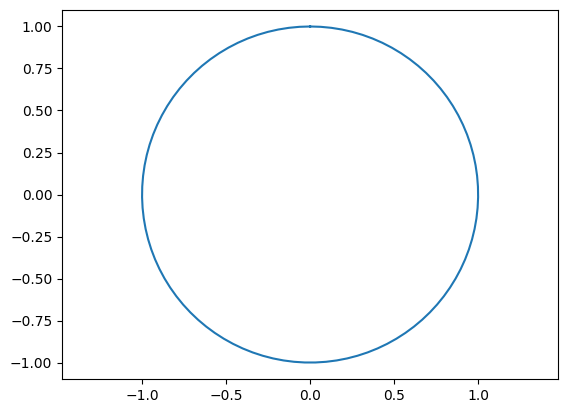

In [73]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

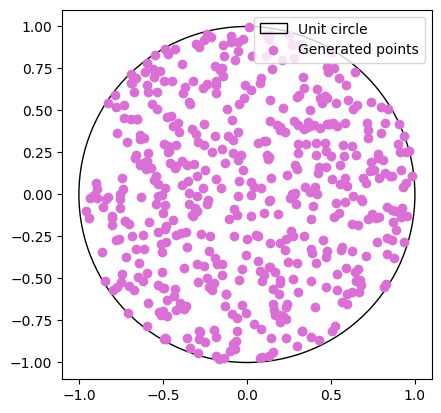

In [34]:
def points(n):
  r = np.sqrt((np.random.uniform(0,1,n)))
  angle = np.random.uniform(0,2*np.pi,n)
  x = r * np.cos(angle)
  y = r * np.sin(angle)
  return x, y

x, y = points(500)

fig, ax = plt.subplots()
circle = plt.Circle((0, 0), 1, edgecolor='black', facecolor='none', label='Unit circle')
ax.add_patch(circle)
ax.scatter(x, y, color='orchid', label='Generated points')
ax.set_aspect('equal')
plt.legend()
plt.show()